In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer


In [86]:
df = pd.read_excel('../data/cleaned_labeled_dataset_2.xlsx')
df.head()

,text,label,clean_text
0,Kunjungan Prabowo ini untuk meresmikan dan men...,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...
1,RT Anies dapat tepuk tangan meriah saat jadi R...,Politik,anies tepuk tangan meriah rektor mewajibkan ma...
2,@CIqXqwGAT04tMtx4OCATxjoVq7vv/Y8HeYaIOgMFg8Y= ...,Demografi,"memang bener memang, pendukung 01 goblok, pend..."
3,RT @L3R8XFBw3WGbxRPSj0/0hHZTbqVGX7qtfwRg9zmhK7...,Politik,anies bersikap kritis kinerja prabowo dianggap...
4,Anies Baswedan Harap ASN termasuk TNI dan Polr...,Politik,anies baswedan harap asn tni polri pegang sump...


In [87]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

text          0
label         0
clean_text    0
dtype: int64

In [88]:
df.drop(columns='text', inplace=True)
df.head()

,label,clean_text
0,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...
1,Politik,anies tepuk tangan meriah rektor mewajibkan ma...
2,Demografi,"memang bener memang, pendukung 01 goblok, pend..."
3,Politik,anies bersikap kritis kinerja prabowo dianggap...
4,Politik,anies baswedan harap asn tni polri pegang sump...


In [89]:
def get_top_words(df, n=3, stop_words=None):
    # Pisahkan data berdasarkan label
    grouped = df.groupby('label')

    words_freq = {}

    for name, group in grouped:
        # Tokenisasi dan hitung frekuensi kata
        vectorizer = CountVectorizer(stop_words=stop_words)
        X = vectorizer.fit_transform(group['clean_text'])
        word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
        total_freq = word_freq.sum().sort_values(ascending=False)
        
        # Simpan n kata yang paling sering muncul dan frekuensinya
        words_freq[name] = total_freq.nlargest(n).to_dict()

    # buat fitur dari kata-kata yang paling sering muncul
    features = set()
    for label, freq in words_freq.items():
        for word in freq.keys():
            features.add(word)

    features = list(features)

    return words_freq, features

In [90]:
words_freq, features = get_top_words(df, n=5, stop_words=['ganjar', 'anies', 'prabowo', 'mahfud', 'pranowo', 'dalam'])
print(words_freq)
print(features)

{'Demografi': {'anak': 17, 'muda': 16, 'etnis': 12, 'generasi': 12, 'kalangan': 12}, 'Ekonomi': {'ekonomi': 117, 'jnk': 98, 'ganjarpranowopilihanumat': 97, 'program': 84, 'ganjarmahfudrebound': 82}, 'Geografi': {'pulau': 7, 'jakarta': 5, '2024': 4, 'anak': 4, 'ikn': 3}, 'Ideologi': {'negara': 80, 'ganjarpranowopilihanumat': 74, 'indonesia': 69, 'jnk': 65, 'ganjarmahfudrebound': 61}, 'Pertahanan dan Keamanan': {'pertahanan': 115, 'ganjarmahfud2024': 54, 'tni': 47, 'indonesia': 43, 'keamanan': 39}, 'Politik': {'jnk': 478, 'gibran': 435, 'ganjarmahfudrebound': 435, 'ganjarpranowopilihanumat': 407, 'indonesia': 401}, 'Sosial Budaya': {'anak': 87, 'indonesia': 64, 'desak': 50, 'pendidikan': 47, 'program': 42}, 'Sumber Daya Alam': {'air': 24, 'program': 23, 'pertanian': 23, 'food': 21, 'estate': 20}}
['keamanan', 'kalangan', 'air', 'gibran', 'muda', 'negara', 'jakarta', 'ganjarmahfud2024', 'pulau', 'pertanian', 'anak', 'pertahanan', 'indonesia', 'food', 'program', 'ganjarpranowopilihanumat',

In [91]:
# tambahkan fitur ke dataframe dan isi dengan frekuensi kata
for feature in features:
    df[feature] = 0

for i, row in df.iterrows():
    for feature in features:
        df.at[i, feature] = row['clean_text'].count(feature)

df.head()

,label,clean_text,keamanan,kalangan,air,gibran,muda,negara,jakarta,ganjarmahfud2024,...,generasi,jnk,desak,2024,tni,ekonomi,estate,pendidikan,ikn,ganjarmahfudrebound
0,Sumber Daya Alam,kunjungan prabowo meresmikan menyerahkan proye...,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Politik,anies tepuk tangan meriah rektor mewajibkan ma...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Demografi,"memang bener memang, pendukung 01 goblok, pend...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,0
3,Politik,anies bersikap kritis kinerja prabowo dianggap...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Politik,anies baswedan harap asn tni polri pegang sump...,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [92]:
df['clean_text'].iloc[0]

'kunjungan prabowo meresmikan menyerahkan proyek bantuan air bersih titik. #indonesiasentris #indonesiahijau #02melanjutkan #anakmudaindonesiaemas prabowo subianto'

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import re

def tokenize(text, stopwords):
    # Cari semua hashtag dan hapus stopwords
    return [word for word in re.findall(r"#(\w+)", text) if word not in stopwords]

def get_top_hashtags(df, n=3, stopwords=None):
    # Pisahkan data berdasarkan label
    grouped = df.groupby('label')

    hashtags_freq = {}

    for name, group in grouped:
        # Tokenisasi dan hitung frekuensi hashtag
        vectorizer = CountVectorizer(tokenizer=lambda text: tokenize(text, stopwords))
        X = vectorizer.fit_transform(group['clean_text'])
        hashtag_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
        total_freq = hashtag_freq.sum().sort_values(ascending=False)
        
        # Simpan n hashtag yang paling sering muncul dan frekuensinya
        hashtags_freq[name] = total_freq.nlargest(n).to_dict()

    # buat fitur dari hashtag yang paling sering muncul
    features = set()
    for label, freq in hashtags_freq.items():
        for hashtag in freq.keys():
            features.add(hashtag)

    features = list(features)

    return hashtags_freq, features

In [94]:
stopwords = []
hashtags_freq, features = get_top_hashtags(df, n=5, stopwords=stopwords)
print(hashtags_freq)
print(features)

d:\miniconda\envs\mlops\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\miniconda\envs\mlops\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\miniconda\envs\mlops\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\miniconda\envs\mlops\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\miniconda\envs\mlops\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


d:\miniconda\envs\mlops\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


{'Demografi': {'ganjarmahfud2024': 7, 'l3bihbaik': 3, '02melanjutkan': 2, 'indonesiahijau': 2, 'anakmudaindonesiaemas': 2}, 'Ekonomi': {'jnk': 98, 'ganjarpranowopilihanumat': 97, 'ganjarmahfudrebound': 82, 'ganjarmahfud2024': 27, 'rembuganjar': 13}, 'Geografi': {'ganjarmahfud2024': 1, 'hotlineparisamin': 1, 'l3bihbaik': 1, 'mahfudlebihbaik3': 1}, 'Ideologi': {'ganjarpranowopilihanumat': 74, 'jnk': 64, 'ganjarmahfudrebound': 61, 'ganjarmahfud2024': 25, 'l3bihbaik': 19}, 'Pertahanan dan Keamanan': {'ganjarmahfud2024': 53, 'coblos3': 33, 'dulujokowisekarangganjar': 23, 'ganjarmahfudm3nangdebat': 12, '02melanjutkan': 11}, 'Politik': {'jnk': 446, 'ganjarmahfudrebound': 435, 'ganjarpranowopilihanumat': 407, 'ganjarmahfud2024': 213, 'coblos3': 161}, 'Sosial Budaya': {'ganjarmahfud2024': 22, 'ganjarmahfudrebound': 13, 'jnk': 13, 'aminajadulu': 11, 'ganjarpranowopilihanumat': 10}, 'Sumber Daya Alam': {'indonesiasentris': 11, 'anakmudaindonesiaemas': 10, '02melanjutkan': 10, 'indonesiahijau': 10

d:\miniconda\envs\mlops\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
d:\miniconda\envs\mlops\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [95]:
# tambahkan fitur ke dataframe dan isi dengan frekuensi hashtag
for feature in features:
    df[feature] = 0

for i, row in df.iterrows():
    for feature in features:
        df.at[i, feature] = row['clean_text'].count('#' + feature)
        



In [96]:
df.columns

Index(['label', 'clean_text', 'keamanan', 'kalangan', 'air', 'gibran', 'muda',
       'negara', 'jakarta', 'ganjarmahfud2024', 'pulau', 'pertanian', 'anak',
       'pertahanan', 'indonesia', 'food', 'program',
       'ganjarpranowopilihanumat', 'etnis', 'generasi', 'jnk', 'desak', '2024',
       'tni', 'ekonomi', 'estate', 'pendidikan', 'ikn', 'ganjarmahfudrebound',
       'l3bihbaik', 'aminajadulu', 'ganjarmahfudm3nangdebat',
       'dulujokowisekarangganjar', 'rembuganjar', 'indonesiasentris',
       'mahfudlebihbaik3', 'hotlineparisamin', '02melanjutkan', 'coblos3',
       'anakmudaindonesiaemas', 'indonesiahijau'],
      dtype='object')

In [100]:
# modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

X = df.drop(columns=['label', 'clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [101]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

balanced_accuracy_score(y_test, y_pred)


0.3042427384639418

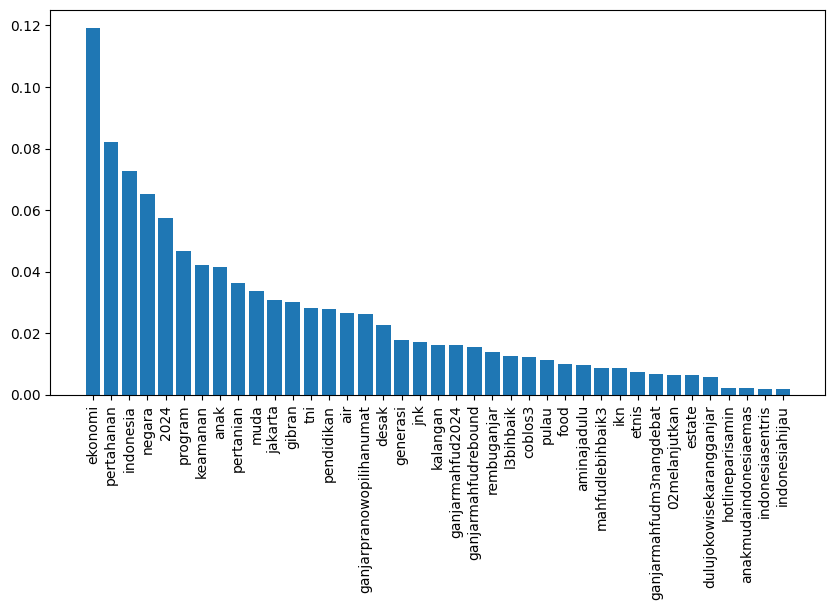

In [102]:
# feature importance
import matplotlib.pyplot as plt

importances = clf.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()